#  Suspicious Web Threat Interaction Analysis

##  Objective
To detect and analyze patterns in web interactions for identifying suspicious or potentially harmful activities using anomaly detection techniques.

Dataset: `web_threats.csv`


In [ ]:
import pandas as pd

df = pd.read_csv("web_threats.csv.csv")
df.head()

## 1. Data Import and Overview

We load the dataset and observe its structure — including shape, types, and missing values.


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

## 2. Data Preprocessing

- Convert timestamp fields to datetime
- Extract useful time features
- Ensure there are no missing values


In [5]:
df = pd.read_csv("web_threats.csv.csv")
df.head()


,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


##  Dataset Overview

We start by examining the structure and basic information about the dataset using `df.info()`. This helps us understand the number of entries, column data types, and missing values (if any).


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

##  Top Detection Types

We examine the most frequently occurring detection types in the dataset. This helps in identifying which types of suspicious activities are most common.

This is useful for understanding the dominant threat categories logged by the system.


In [5]:
import pandas as pd

df = pd.read_csv("web_threats.csv.csv")  
df['detection_types'].value_counts().head(10)

detection_types
waf_rule    282
Name: count, dtype: int64

##  Top Rule Names Triggered

This section displays the most frequently triggered rule names. These rules are typically defined by the security system to detect specific patterns or behaviors.

Understanding the most active rules gives insight into what types of threats or suspicious activities the system is flagging most often.


In [6]:
df['rule_names'].value_counts().head(10)


rule_names
Suspicious Web Traffic    282
Name: count, dtype: int64

##  Top Source Country Codes

This section analyzes the top source IP country codes from which the suspicious web interactions originated. It helps identify geographic patterns in the traffic.

Frequent occurrences from specific countries might indicate targeted attacks or automated bot activity originating from those regions.


In [7]:
df['src_ip_country_code'].value_counts().head(10)


src_ip_country_code
US    113
CA     72
DE     28
AT     21
NL     18
AE     16
IL     14
Name: count, dtype: int64

##  Suspicious Web Events by Hour

To identify when suspicious activity is most frequent, we extract the hour from the `creation_time` and plot the distribution of events by hour.

This analysis helps reveal time-based patterns — such as spikes in suspicious traffic during specific hours — which can be useful for monitoring and response planning.


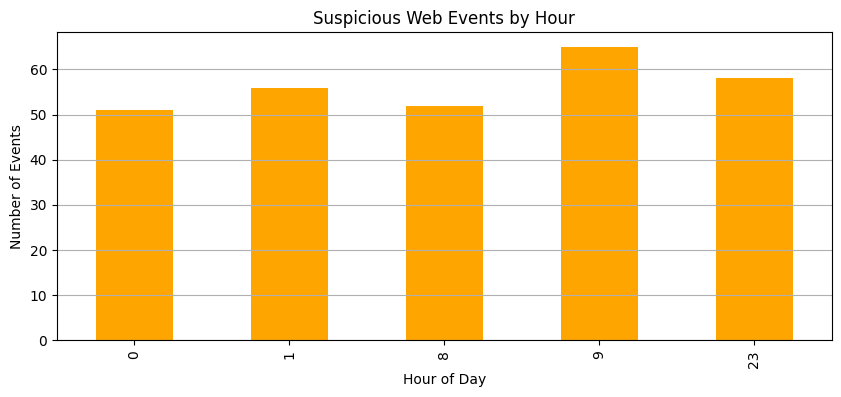

In [10]:
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['hour'] = df['creation_time'].dt.hour

df['hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,4), color='orange')
plt.title("Suspicious Web Events by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Events")
plt.grid(axis='y')
plt.show()


##  Data Preprocessing

Before moving forward with analysis, we perform essential data cleaning steps:

- Convert the `creation_time` and `end_time` columns to datetime format.
- Strip any leading/trailing spaces from column names to avoid reference issues.
- Check for missing values to ensure data completeness.

These steps are crucial for accurate analysis and visualization later on.


In [11]:
# Convert time columns to datetime
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Strip column names (remove leading/traili
ng spaces if any)
df.columns = df.columns.str.strip()

# Check for missing values
print(df.isnull().sum())


bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
hour                   0
dtype: int64


##  Traffic Pattern Analysis: Bytes In vs. Bytes Out

This scatter plot helps visualize the relationship between incoming (`bytes_in`) and outgoing (`bytes_out`) traffic for each web interaction.

Clusters or outliers in this plot can hint at unusual or suspicious behavior — such as data exfiltration (high bytes out) or infiltration attempts (high bytes in).


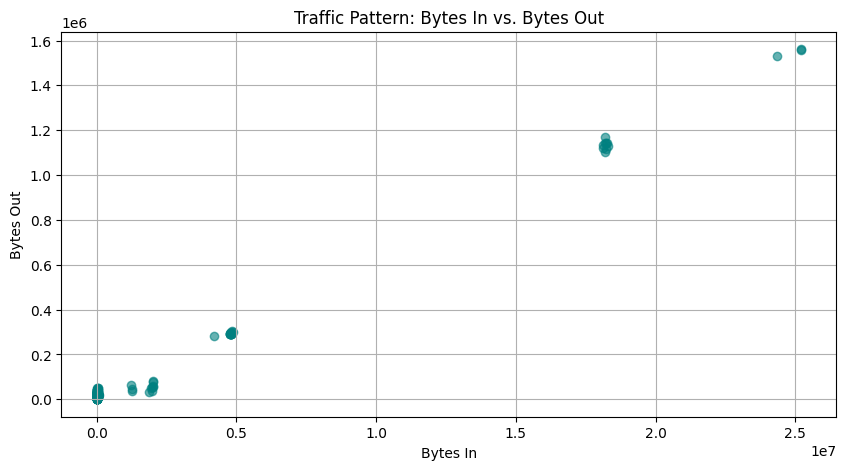

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(df['bytes_in'], df['bytes_out'], alpha=0.6, color='teal')
plt.title("Traffic Pattern: Bytes In vs. Bytes Out")
plt.xlabel("Bytes In")
plt.ylabel("Bytes Out")
plt.grid(True)
plt.show()


##  Protocol Usage Distribution

This bar chart shows the distribution of network protocols used in the dataset. Identifying the most frequently used protocols (e.g., HTTP, HTTPS) can help highlight standard vs. unusual communication methods that may signal suspicious behavior.


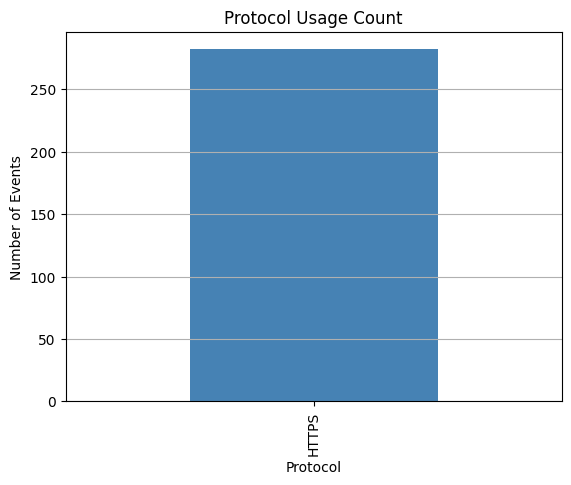

In [13]:
df['protocol'].value_counts().plot(kind='bar', color='steelblue')
plt.title("Protocol Usage Count")
plt.xlabel("Protocol")
plt.ylabel("Number of Events")
plt.grid(axis='y')
plt.show()


##  Feature Engineering: Duration & Average Packet Size

To enhance the model's ability to detect anomalies, we engineer two new features:

- **`duration`**: The total time (in seconds) between the start and end of each session.
- **`avg_packet_size`**: The average size of packets exchanged during the session, calculated using bytes transferred divided by duration.

These features help highlight abnormal session behaviors such as:
- Very short sessions with high data transfer
- Unusually long sessions with low activity


In [14]:
# 1. Create a new 'duration' column in seconds
df['duration'] = (df['end_time'] - df['creation_time']).dt.total_seconds()

# 2. Handle any 0-second durations to avoid divide-by-zero
df['duration'] = df['duration'].replace(0, 0.001)

# 3. Create average packet size
df['avg_packet_size'] = (df['bytes_in'] + df['bytes_out']) / df['duration']

# Check if it worked
df[['duration', 'avg_packet_size']].head()


,duration,avg_packet_size
0,600.0,30.986667
1,600.0,81.830000
2,600.0,69.956667
3,600.0,74.706667
4,600.0,34.030000


##  Country-Based Interaction Analysis

To identify where the majority of web interactions originate from, we visualize the top 10 most frequent source IP country codes. This can help uncover patterns such as:

- Frequent traffic from a specific region
- Potential concentration of suspicious or automated access attempts

This bar chart highlights the country codes with the highest number of logged events.


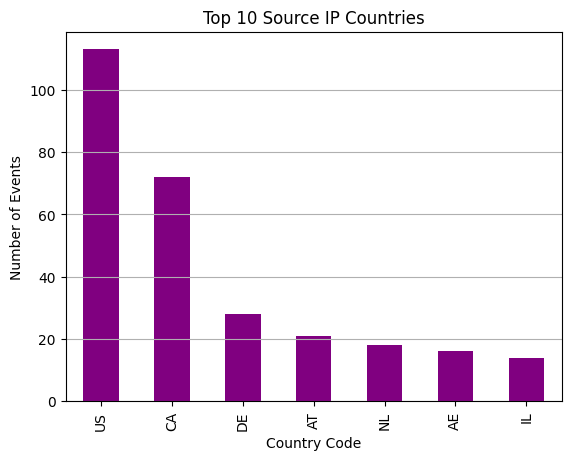

In [15]:
df['src_ip_country_code'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Source IP Countries")
plt.xlabel("Country Code")
plt.ylabel("Number of Events")
plt.grid(axis='y')
plt.show()


##  Suspicious Activities Based on Destination Ports

Ports often indicate the type of service being accessed (e.g., port 80 for HTTP, 443 for HTTPS). Analyzing the most frequently targeted destination ports helps reveal:

- Common services under interaction or attack
- Potential unauthorized access attempts to non-standard ports

The following chart displays the top 10 most used destination ports in the dataset.


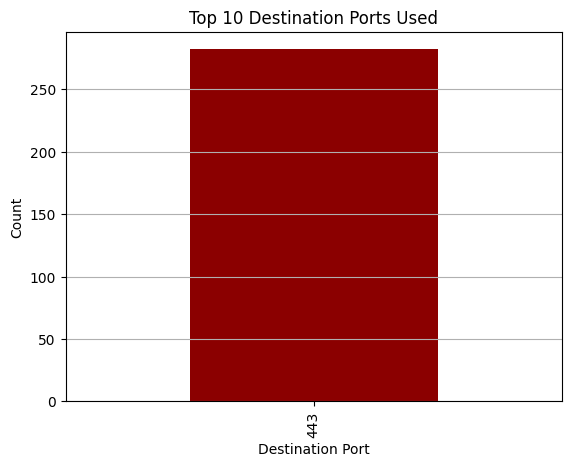

In [16]:
df['dst_port'].value_counts().head(10).plot(kind='bar', color='darkred')
plt.title("Top 10 Destination Ports Used")
plt.xlabel("Destination Port")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()


In [19]:
!pip install scikit-learn




   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ------------ --------------------------- 2.9/8.9 MB 27.9 MB/s eta 0:00:01
   --------------------- ------------------ 4.7/8.9 MB 11.9 MB/s eta 0:00:01
   ------------------------ --------------- 5.5/8.9 MB 9.9 MB/s eta 0:00:01
   ----------------------------- ---------- 6.6/8.9 MB 7.7 MB/s eta 0:00:01
   ---------------------------------- ----- 7.6/8.9 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------  8.9/8.9 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 6.5 MB/s  0:00:01
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   - -------------------------------------- 1.3/38.6 MB 16.6 MB/s eta 0:00:03
   -- ------------------------------------- 2.6/38.6 MB 7.5 MB/s eta 0:00:05
   --- ------------------------------------ 3.4/38.6 MB 6.5 MB/s eta 0:00:06
   ---- ----------------------------------- 3.9/38.6 MB 5.6 MB/s eta 0:00:07
   ---- -------------

##  Modeling: Anomaly Detection with Isolation Forest

To detect suspicious or unusual patterns in the traffic data, we use the **Isolation Forest** algorithm — a popular technique for anomaly detection in cybersecurity.

###  Features Used:
- `bytes_in`
- `bytes_out`
- `duration`
- `avg_packet_size`

These features help identify abnormal sessions that may indicate infiltration attempts, data exfiltration, or bot activity.


In [26]:
from sklearn.ensemble import IsolationForest

# Features we'll use for anomaly detection
features = ['bytes_in', 'bytes_out', 'duration', 'avg_packet_size']
X = df[features]


##  Training the Model & Labeling Anomalies

We now train the **Isolation Forest** model to detect unusual patterns in the web traffic.

- **Model Parameters**:
  - `n_estimators=100`: Number of trees used
  - `contamination=0.05`: We expect ~5% of the data to be anomalies
  - `random_state=42`: For reproducibility

The model returns:
- **-1** for anomalies
- **1** for normal data

We map this output to a new column `is_anomaly`, where:
- **1 = Anomaly**
- **0 = Normal Traffic**

Finally, we check the distribution of anomalies.


In [28]:
# Train Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(X)

# Label anomalies: 1 = anomaly, 0 = normal
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

# Count anomalies vs normal traffic
df['is_anomaly'].value_counts()


is_anomaly
0    267
1     15
Name: count, dtype: int64

##  Evaluation: Comparing Anomalies vs Normal Traffic

To interpret the model results, we compare the **average values** of key features between:

- **Anomalous traffic** (`is_anomaly = 1`)
- **Normal traffic** (`is_anomaly = 0`)

This helps in understanding what makes the anomalies stand out — for example:
- Unusual data transfer (`bytes_in`, `bytes_out`)
- Suspicious session duration
- Abnormal average packet sizes


In [29]:
# Compare average values of features between anomalies and normal traffic
df.groupby('is_anomaly')[['bytes_in', 'bytes_out', 'duration', 'avg_packet_size']].mean()


,bytes_in,bytes_out,duration,avg_packet_size
is_anomaly,,,,
0,4.460447e+05,38521.044944,600.0,807.609551
1,1.460894e+07,903946.066667,600.0,25854.810444


##  Visualization of Anomalies

Using a scatter plot, we visualize the distribution of web traffic based on `bytes_in` and `bytes_out`.

- Blue points represent **normal** traffic.
- Red points represent **anomalies** detected by the Isolation Forest model.

This plot helps to visually identify suspicious traffic patterns.


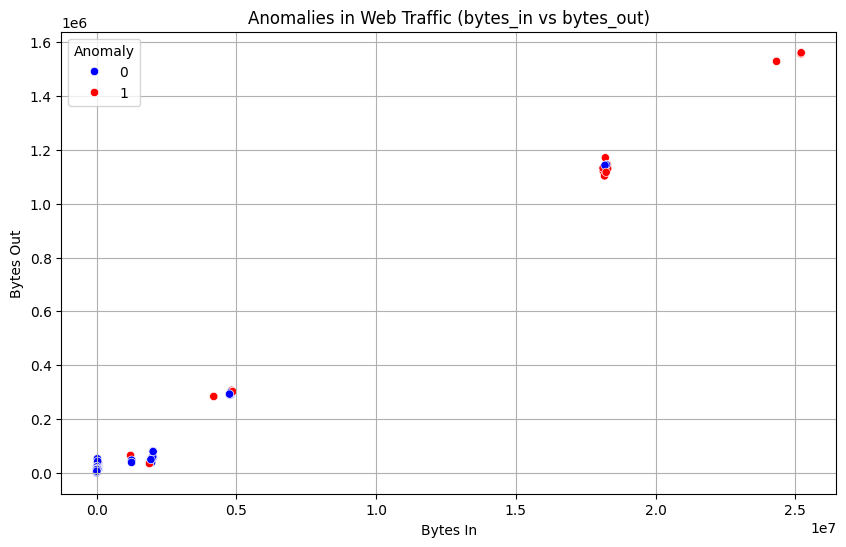

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='bytes_in',
    y='bytes_out',
    hue='is_anomaly',
    palette={0: 'blue', 1: 'red'}
)
plt.title("Anomalies in Web Traffic (bytes_in vs bytes_out)")
plt.xlabel("Bytes In")
plt.ylabel("Bytes Out")
plt.legend(title='Anomaly')
plt.grid(True)
plt.show()
